In [1]:
#Gerekli modüllerin programa dahil edilmesi
from python_speech_features import mfcc
import numpy as np
import scipy
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from fastdtw import fastdtw
from scipy.fftpack import fft, ifft
from scipy.io import loadmat
import librosa, librosa.display
import IPython
import scipy.signal as sgnl

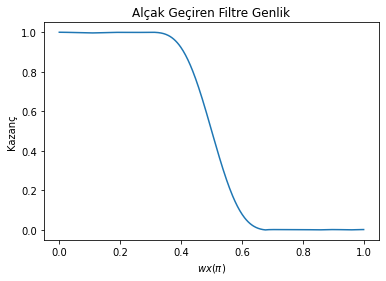

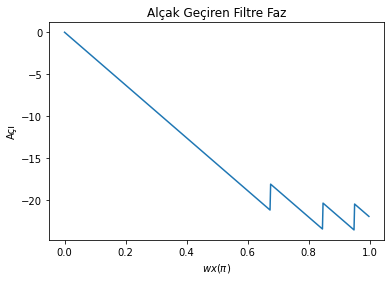

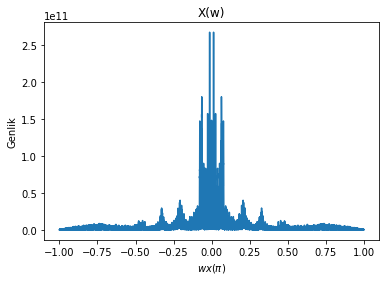

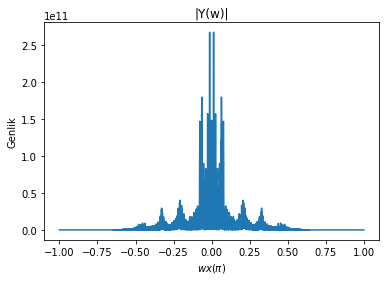

In [2]:
#Alçak geçiren filtrenin yüklenmesi
filter_data = loadmat('filters/LP.mat')
Coeffs = filter_data['ba'].astype(np.float) 
b = Coeffs[0,:] 

#Giriş sinyalinin ve örnekleme frekansının elde edilmesi
(Fs, sig) = wav.read("database/aykut_noise.wav")

#Frekans cevabının ve parametresinin bulunması
w, Hw = sgnl.freqz(b,1)
#Frekans cevabının genliği 
Hw_mag = np.abs(Hw)
#Frekans cevabının fazı
Hw_phs = np.unwrap(np.angle(Hw))

#AGF'nin genlik grafiğinin çizilmesi
plt.title("Alçak Geçiren Filtre Genlik")
plt.xlabel(r"$wx(\pi)$")
plt.ylabel("Kazanç")
plt.plot(w/np.pi, Hw_mag)


plt.figure()

#AGF'nin faz grafiğinin çizilmesi
plt.title("Alçak Geçiren Filtre Faz")
plt.ylabel('Açı')
plt.xlabel(r"$wx(\pi)$")
plt.plot(w/np.pi, Hw_phs)

plt.figure()

#Giriş sinyalinin FFT ile frekans uzayına taşınması
w = np.linspace(-np.pi, np.pi, 4*Fs)
Xw = fft(sig)
Xw_shifted = np.fft.fftshift(Xw)

#Giriş sinyalinin frekans uzayında çizdirilmesi
plt.title("X(w)")
plt.ylabel("Genlik")
plt.xlabel(r"$wx(\pi)$")
plt.plot(w/np.pi, np.abs(Xw_shifted))

#Sinyalin filtrenin girişine uygulanması ile çıkış elde etme
yn = sgnl.lfilter(b, 1, sig)

plt.figure()

#Çıkışın FFT ile frekans uzayına taşınması
Yw = fft(yn)
Yw_shifted = np.fft.fftshift(Yw)

#Çıkışın frekans uzayında çizdirilmesi
plt.title("|Y(w)|")
plt.ylabel("Genlik")
plt.xlabel(r"$wx(\pi)$")
plt.plot(w/np.pi, np.abs(Yw_shifted))

plt.show()

In [3]:
from IPython.lib.display import Audio
print('Orjinal ses sinyali:')
display(Audio(sig, rate=16000))

Orjinal ses sinyali:


In [4]:
from IPython.lib.display import Audio
print('Filtrelenmiş ses sinyali:')
display(Audio(yn, rate=16000))

Filtrelenmiş ses sinyali:


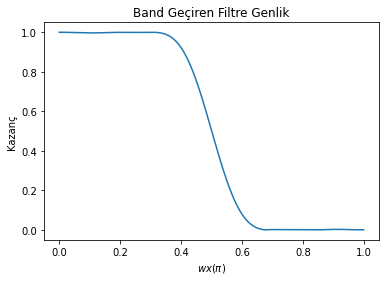

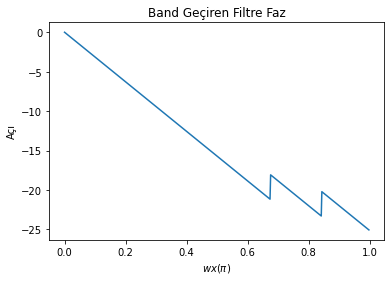

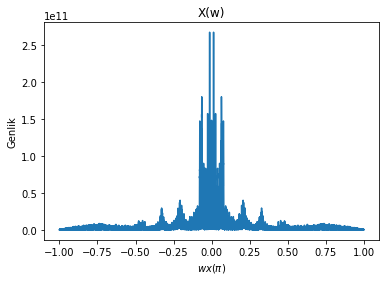

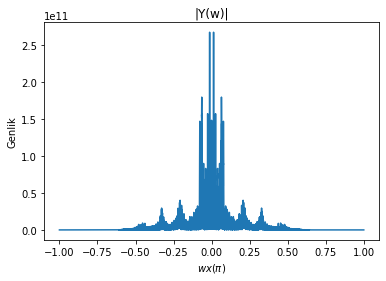

In [5]:
#Band geçiren filtrenin yüklenmesi
filter_data = loadmat('filters/bandpass.mat')
Coeffs = filter_data['ba'].astype(np.float) 
b = Coeffs[0,:] 

#Giriş sinyalinin ve örnekleme frekansının elde edilmesi
(Fs, sig) = wav.read("database/aykut_noise.wav")

#Frekans cevabının ve parametresinin bulunması
w, Hw = sgnl.freqz(b,1)
#Frekans cevabının genliği 
Hw_mag = np.abs(Hw)
#Frekans cevabının fazı
Hw_phs = np.unwrap(np.angle(Hw))

#BGF'nin genlik grafiğinin çizilmesi
plt.title("Band Geçiren Filtre Genlik")
plt.xlabel(r"$wx(\pi)$")
plt.ylabel("Kazanç")
plt.plot(w/np.pi, Hw_mag)


plt.figure()

#BGF'nin faz grafiğinin çizilmesi
plt.title("Band Geçiren Filtre Faz")
plt.ylabel('Açı')
plt.xlabel(r"$wx(\pi)$")
plt.plot(w/np.pi, Hw_phs)

plt.figure()

#Giriş sinyalinin FFT ile frekans uzayına taşınması
w = np.linspace(-np.pi, np.pi, 4*Fs)
Xw = fft(sig)
Xw_shifted = np.fft.fftshift(Xw)

#Giriş sinyalinin frekans uzayında çizdirilmesi
plt.title("X(w)")
plt.ylabel("Genlik")
plt.xlabel(r"$wx(\pi)$")
plt.plot(w/np.pi, np.abs(Xw_shifted))

#Sinyalin filtrenin girişine uygulanması ile çıkış elde etme
yn = sgnl.lfilter(b, 1, sig)

plt.figure()

#Çıkışın FFT ile frekans uzayına taşınması
Yw = fft(yn)
Yw_shifted = np.fft.fftshift(Yw)

#Çıkışın frekans uzayında çizdirilmesi
plt.title("|Y(w)|")
plt.ylabel("Genlik")
plt.xlabel(r"$wx(\pi)$")
plt.plot(w/np.pi, np.abs(Yw_shifted))

plt.show()

In [6]:
from IPython.lib.display import Audio
print('Orjinal ses sinyali:')
display(Audio(sig, rate=16000))

Orjinal ses sinyali:


In [7]:
from IPython.lib.display import Audio
print('Filtrelenmiş ses sinyali:')
display(Audio(yn, rate=16000))

Filtrelenmiş ses sinyali:


In [8]:
#Giriş sinyali
(Fs, sig) = wav.read("database/aykut_f1.wav")

from IPython.lib.display import Audio
print('Filtrelenmiş ses sinyali:')
display(Audio(sig, rate=Fs))

Filtrelenmiş ses sinyali:


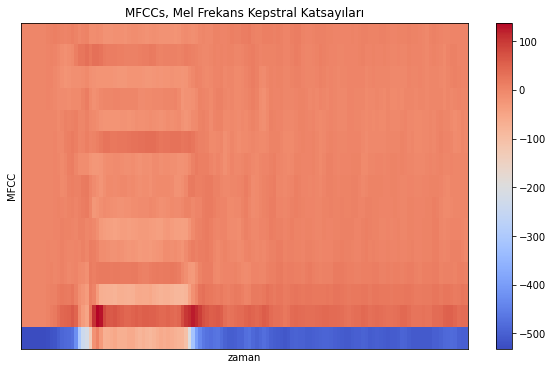

In [9]:
#Giriş sinyali dizini
file = "database/aykut_f1.wav"

#Sesin yüklenmesi ve örnekleme frekansının bulunması
signal, Fs = librosa.load(file, sr=16000)

#MFC katsayılarının hesaplanması
MFCCs = librosa.feature.mfcc(signal, Fs, n_mfcc=15)

#MFCC grafiğinin çizdirilmesi
plt.figure(figsize = (10,6))
librosa.display.specshow(MFCCs, sr=Fs)
plt.xlabel("zaman")
plt.ylabel("MFCC")
plt.colorbar()
plt.title("MFCCs, Mel Frekans Kepstral Katsayıları")
plt.show()

In [10]:
#Tespit edilecek harf
letter = ""

#Giriş sinyali
(Fs, sig) = wav.read("database/aykut_f1.wav")

#Giriş sinyalinin band geçiren filtreden geçirilmesi
sig = sgnl.lfilter(b, 1, sig)

#Giriş sinyalinin MFC katsayılarının bulunması
mfcc_output = mfcc(sig, Fs)

##Hasan
(Fs, sig) = wav.read("database/hasan_f1.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f1_hasan = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/hasan_f2.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f2_hasan = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/hasan_f3.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f3_hasan = mfcc(sig, Fs)


(Fs, sig) = wav.read("database/hasan_z1.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z1_hasan = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/hasan_z2.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z2_hasan = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/hasan_z3.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z3_hasan = mfcc(sig, Fs)

##Dilara
(Fs, sig) = wav.read("database/dilara_f1.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f1_dilara = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/dilara_f2.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f2_dilara = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/dilara_f3.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f3_dilara = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/dilara_z1.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z1_dilara = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/dilara_z2.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z2_dilara = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/dilara_z3.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z3_dilara = mfcc(sig, Fs)

##Aykut
(Fs, sig) = wav.read("database/aykut_f1.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f1_aykut = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/aykut_f2.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f2_aykut = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/aykut_f3.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_f3_aykut = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/aykut_z1.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z1_aykut = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/aykut_z2.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z2_aykut = mfcc(sig, Fs)

(Fs, sig) = wav.read("database/aykut_z3.wav")
sig = sgnl.lfilter(b, 1, sig)
mfcc_z3_aykut = mfcc(sig, Fs)

#Hasan'ın seslerinin giriş sinyaline olan uzaklıklarının hesaplanması                       
f1_h=fastdtw(mfcc_output, mfcc_f1_hasan)
f2_h=fastdtw(mfcc_output, mfcc_f2_hasan)
f3_h=fastdtw(mfcc_output, mfcc_f3_hasan)
z1_h=fastdtw(mfcc_output, mfcc_z1_hasan)
z2_h=fastdtw(mfcc_output, mfcc_z2_hasan)
z3_h=fastdtw(mfcc_output, mfcc_z3_hasan)


#Dilara'nın seslerinin giriş sinyaline olan uzaklıklarının hesaplanması  
f1_d=fastdtw(mfcc_output, mfcc_f1_dilara)
f2_d=fastdtw(mfcc_output, mfcc_f2_dilara)
f3_d=fastdtw(mfcc_output, mfcc_f3_dilara)
z1_d=fastdtw(mfcc_output, mfcc_z1_dilara)
z2_d=fastdtw(mfcc_output, mfcc_z2_dilara)
z3_d=fastdtw(mfcc_output, mfcc_z3_dilara)

#Aykut'un seslerinin giriş sinyaline olan uzaklıklarının hesaplanması
f1_a=fastdtw(mfcc_output, mfcc_f1_aykut)
f2_a=fastdtw(mfcc_output, mfcc_f2_aykut)
f3_a=fastdtw(mfcc_output, mfcc_f3_aykut)
z1_a=fastdtw(mfcc_output, mfcc_z1_aykut)
z2_a=fastdtw(mfcc_output, mfcc_z2_aykut)
z3_a=fastdtw(mfcc_output, mfcc_z3_aykut)

#Sonuçların kaydedileceği dizi
result=[]

#Hasan'ın yakınsama değerlerinin kaydedilmesi
result.append(f1_h[0])
result.append(f2_h[0])
result.append(f3_h[0])
result.append(z1_h[0])
result.append(z2_h[0])
result.append(z3_h[0])

print("Hasan F1 mesafesi:" + str(f1_h[0]))
print("Hasan F2 mesafesi:" + str(f2_h[0]))
print("Hasan F3 mesafesi:" + str(f3_h[0]))
print("Hasan Z1 mesafesi:" + str(z1_h[0]))
print("Hasan Z2 mesafesi:" + str(z2_h[0]))
print("Hasan Z3 mesafesi:" + str(z3_h[0]))

#Dilara'nın yakınsama değerlerinin kaydedilmesi
result.append(f1_d[0])
result.append(f2_d[0])
result.append(f3_d[0])
result.append(z1_d[0])
result.append(z2_d[0])
result.append(z3_d[0])

print("Dilara F1 mesafesi:" + str(f1_d[0]))
print("Dilara F2 mesafesi:" + str(f2_d[0]))
print("Dilara F3 mesafesi:" + str(f3_d[0]))
print("Dilara Z1 mesafesi:" + str(z1_d[0]))
print("Dilara Z2 mesafesi:" + str(z2_d[0]))
print("Dilara Z3 mesafesi:" + str(z3_d[0]))

#Aykut'un yakınsama değerlerinin kaydedilmesi
result.append(f1_a[0])
result.append(f2_a[0])
result.append(f3_a[0])
result.append(z1_a[0])
result.append(z2_a[0])
result.append(z3_a[0])

print("Aykut F1 mesafesi:" + str(f1_a[0]))
print("Aykut F2 mesafesi:" + str(f2_a[0]))
print("Aykut F3 mesafesi:" + str(f3_a[0]))
print("Aykut Z1 mesafesi:" + str(z1_a[0]))
print("Aykut Z2 mesafesi:" + str(z2_a[0]))
print("Aykut Z3 mesafesi:" + str(z3_a[0]))

#Küçükten büyüğe listenin sıralanması(Minimum değerin sıfırıncı indise gelmesi)
sorted_list = sorted(result)

#Karar mekanizması
if(sorted_list[0]==f1_h[0] or sorted_list[0]==f2_h[0] or
   sorted_list[0]==f3_h[0] or sorted_list[0]==f1_d[0] or
   sorted_list[0]==f2_d[0] or sorted_list[0]==f3_d[0] or
   sorted_list[0]==f1_a[0] or sorted_list[0]==f2_a[0] or
   sorted_list[0]==f3_a[0]):
    letter = "f"
elif(sorted_list[0]==z1_h[0] or sorted_list[0]==z2_h[0] or 
     sorted_list[0]==z3_h[0] or sorted_list[0]==z1_d[0] or 
     sorted_list[0]==z2_d[0] or sorted_list[0]==z3_d[0] or
     sorted_list[0]==z1_a[0] or sorted_list[0]==z2_a[0] or
     sorted_list[0]==z3_a[0]):
    letter = "z"
else:
    letter = "none"
    
print("Bulunan harf:" + letter)

Hasan F1 mesafesi:54863.08725583002
Hasan F2 mesafesi:52679.89668171367
Hasan F3 mesafesi:54522.08895757814
Hasan Z1 mesafesi:61053.010076207385
Hasan Z2 mesafesi:54977.68295596177
Hasan Z3 mesafesi:55991.228445910194
Dilara F1 mesafesi:51898.282388378175
Dilara F2 mesafesi:57597.87976747291
Dilara F3 mesafesi:59278.114663965214
Dilara Z1 mesafesi:58566.978684993344
Dilara Z2 mesafesi:54150.98172231325
Dilara Z3 mesafesi:59603.27524146708
Aykut F1 mesafesi:0.0
Aykut F2 mesafesi:33395.782357918804
Aykut F3 mesafesi:33879.56308373447
Aykut Z1 mesafesi:42476.48215181282
Aykut Z2 mesafesi:38964.19955356863
Aykut Z3 mesafesi:40311.76059666079
Bulunan harf:f
